**Sheth L.U.J. & Sir M.V. College Of Arts, Science & Commerce**

**Your Name | Roll No.**

**Practical No. 08**

**Aim:** K-Means Clustering    
 • Apply the K-Means algorithm to group similar data points into clusters.    
 • Determine the optimal number of clusters using elbow method or silhouette analysis.    
 • Visualize the clustering results and analyze the cluster characteristics.    


## Introduction

In this notebook, we apply **K-Means Clustering** on the **Unemployment Analysis Dataset**.

The goal is to group countries into clusters based on their **unemployment rate patterns over the years**.



## Import Required Libraries

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

sns.set_theme()


## Load Dataset

In [74]:
df = pd.read_csv('Unemployment-Analysis.csv')
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (235, 33)


,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,AFE,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,...,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11
1,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
2,Africa Western and Central,AFW,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,...,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,...,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,...,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82


## Dataset Overview

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  235 non-null    object 
 1   Country Code  235 non-null    object 
 2   1991          235 non-null    float64
 3   1992          235 non-null    float64
 4   1993          235 non-null    float64
 5   1994          235 non-null    float64
 6   1995          235 non-null    float64
 7   1996          235 non-null    float64
 8   1997          235 non-null    float64
 9   1998          235 non-null    float64
 10  1999          235 non-null    float64
 11  2000          235 non-null    float64
 12  2001          235 non-null    float64
 13  2002          235 non-null    float64
 14  2003          235 non-null    float64
 15  2004          235 non-null    float64
 16  2005          235 non-null    float64
 17  2006          235 non-null    float64
 18  2007          235 non-null    

In [76]:
df.isna().sum()

Country Name    0
Country Code    0
1991            0
1992            0
1993            0
1994            0
1995            0
1996            0
1997            0
1998            0
1999            0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
2020            0
2021            0
dtype: int64

## Feature Selection for Clustering

K-Means works on **numerical data**.

From the Unemployment dataset, we select:
- `2019` (Unemployment rate in 2019)
- `2020` (Unemployment rate in 2020)

These features represent unemployment trends before and during the pandemic.


In [77]:
data = df[['2019', '2020']].dropna()
print("Records used for clustering:", data.shape[0])
data.head()

Records used for clustering: 235


,2019,2020
0,6.91,7.56
1,11.22,11.71
2,6.06,6.77
3,7.42,8.33
4,11.47,13.33


## Feature Scaling

K-Means is distance-based, so scaling is important.
We standardize the features so that both years contribute equally.


In [78]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data[:5]

array([[-0.034653  , -0.13168205],
       [ 0.80743644,  0.62857677],
       [-0.20072632, -0.27640602],
       [ 0.064991  ,  0.00937802],
       [ 0.85628154,  0.9253525 ]])

## Elbow Method to Find Optimal Number of Clusters

The elbow method helps us choose the best value of **K** by plotting:
- Number of clusters (K)
- Within-cluster sum of squares (WCSS)


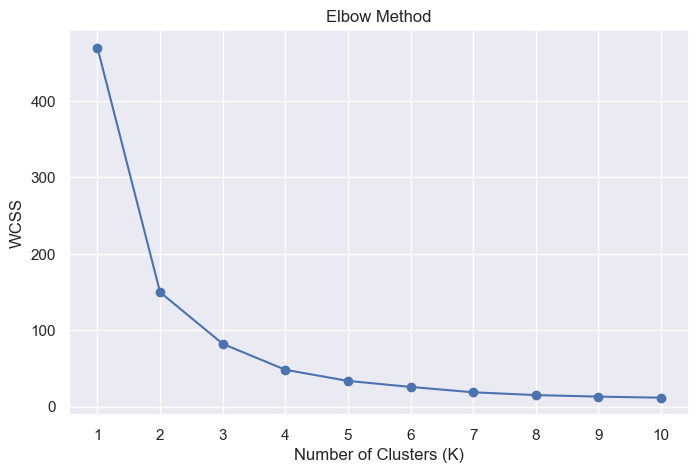

In [79]:
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(K_range)
plt.grid(True)
plt.show()

## Apply K-Means Clustering

Based on the elbow method, we choose **K=3** as the optimal number of clusters.

In [80]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)

data_with_clusters = data.copy()
data_with_clusters['Cluster'] = clusters
data_with_clusters.head(10)

,2019,2020,Cluster
0,6.91,7.56,0
1,11.22,11.71,2
2,6.06,6.77,0
3,7.42,8.33,0
4,11.47,13.33,2
5,10.01,11.49,2
6,2.23,3.19,0
7,9.84,11.46,2
8,18.30,21.21,1
9,5.16,6.46,0


## Visualizing Clusters

We visualize clusters using a scatter plot.

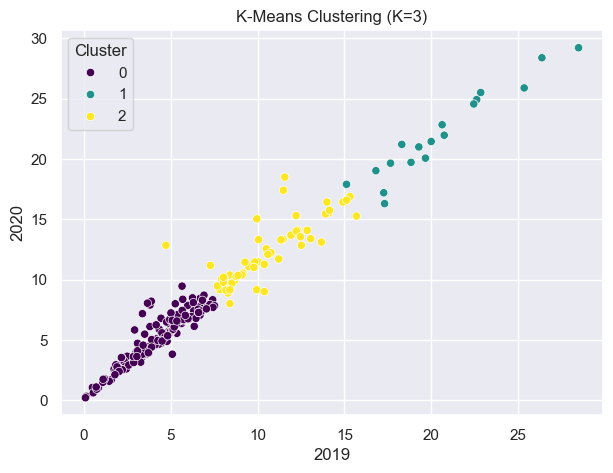

In [81]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=data_with_clusters['2019'],
    y=data_with_clusters['2020'],
    hue=data_with_clusters['Cluster'],
    palette='viridis'
)
plt.title('K-Means Clustering (K=3)')
plt.xlabel('2019')
plt.ylabel('2020')
plt.legend(title='Cluster')
plt.show()

## Cluster Centers

In [82]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(centers, columns=['2019', '2020'])
centers_df.index.name = 'Cluster'
centers_df

,2019,2020
Cluster,,
0,4.349813,5.312437
1,20.535000,22.046667
2,10.525088,12.257719


## Interpretation of Clusters

Each cluster represents a group of countries with similar unemployment patterns.

## Conclusion

In this practical, we successfully applied **K-Means Clustering** on the Unemployment Analysis dataset to group countries based on unemployment rates.

## Image Color Quantization using K-Means

Applying K-Means clustering to reduce the number of colors in an image.

## Import Required Libraries

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import MiniBatchKMeans

## Load Custom Image

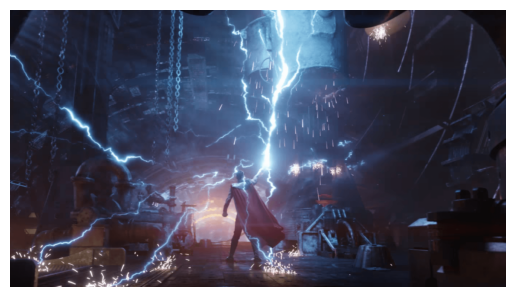

In [84]:
img = Image.open("thor.png").convert("RGB")
thor = np.array(img)

plt.imshow(thor)
plt.axis("off")
plt.show()
thor = np.array(img)

In [85]:
thor.shape

(1028, 1840, 3)

## Prepare Pixel Data

In [86]:
data = thor.reshape(-1, 3)
data = data / 255.0
data.shape

(1891520, 3)

## Visualize Color Space

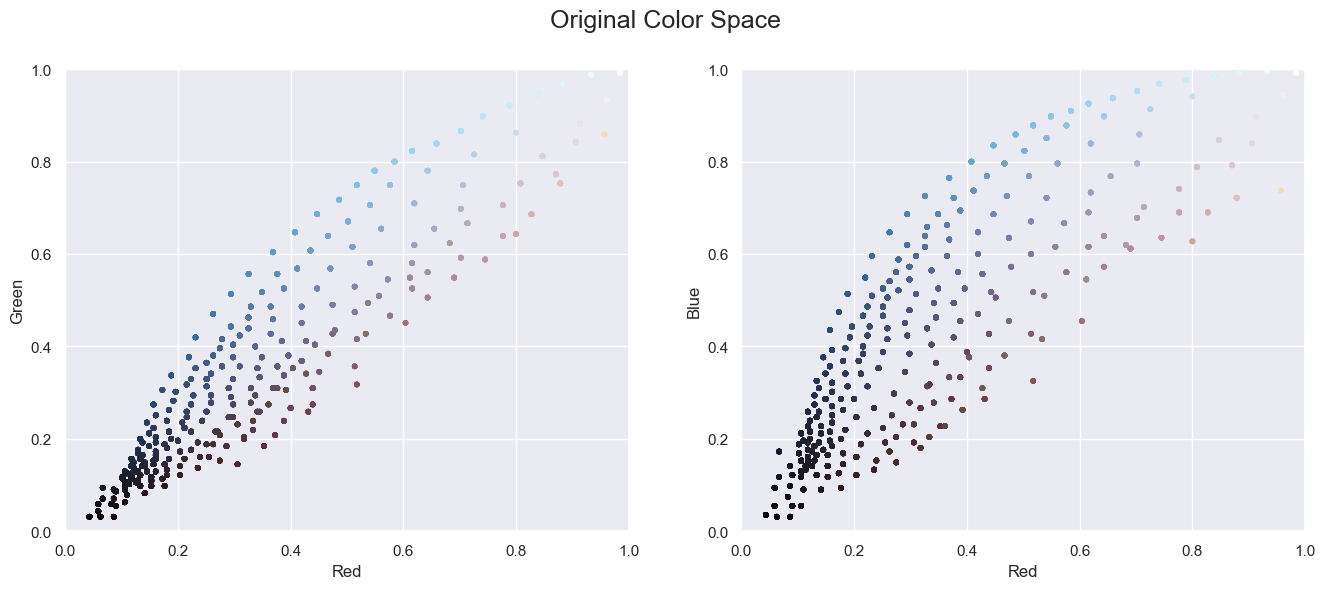

In [87]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    rng = np.random.default_rng(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker=".")
    ax[0].set(xlabel="Red", ylabel="Green", xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker=".")
    ax[1].set(xlabel="Red", ylabel="Blue", xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=18)

plot_pixels(data, title="Original Color Space")

## Apply K-Means Clustering

In [88]:
kmeans = MiniBatchKMeans(n_clusters=32, random_state=0)
kmeans.fit(data)

new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

## Visualize Reduced Colors

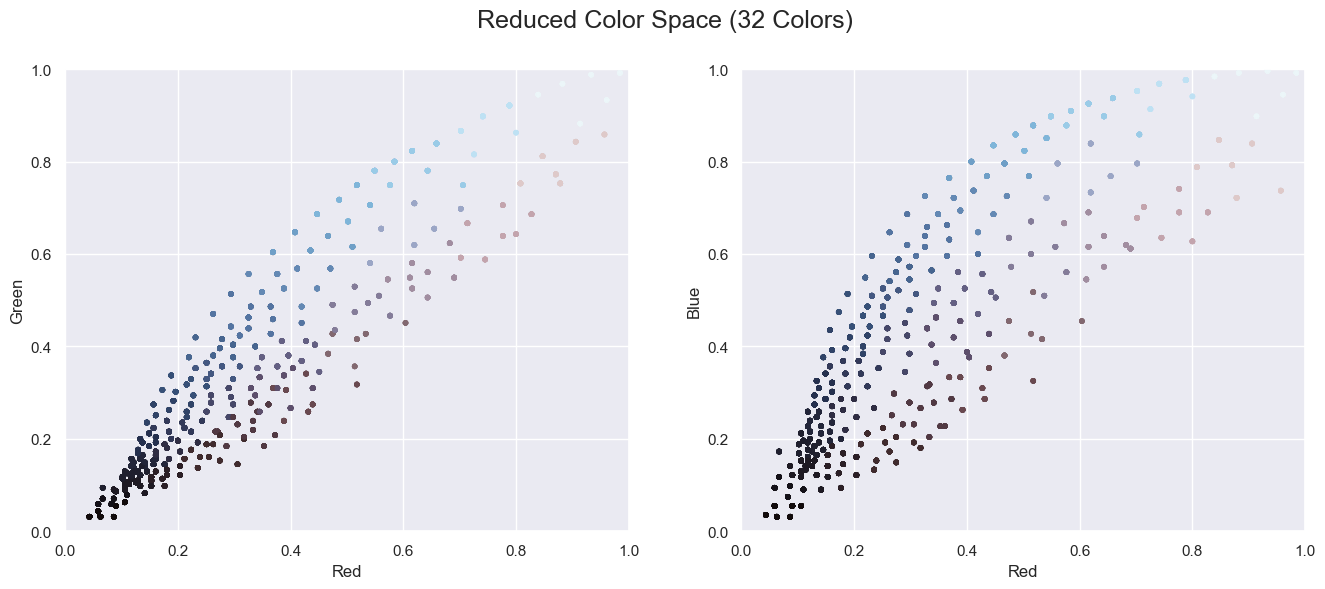

In [89]:
plot_pixels(
    data,
    colors=new_colors,
    title="Reduced Color Space (32 Colors)"
)

## Recolor the Image

In [90]:
thor_recolored = new_colors.reshape(thor.shape)


## Compare Results

Text(0.5, 1.0, '32-Color Image')

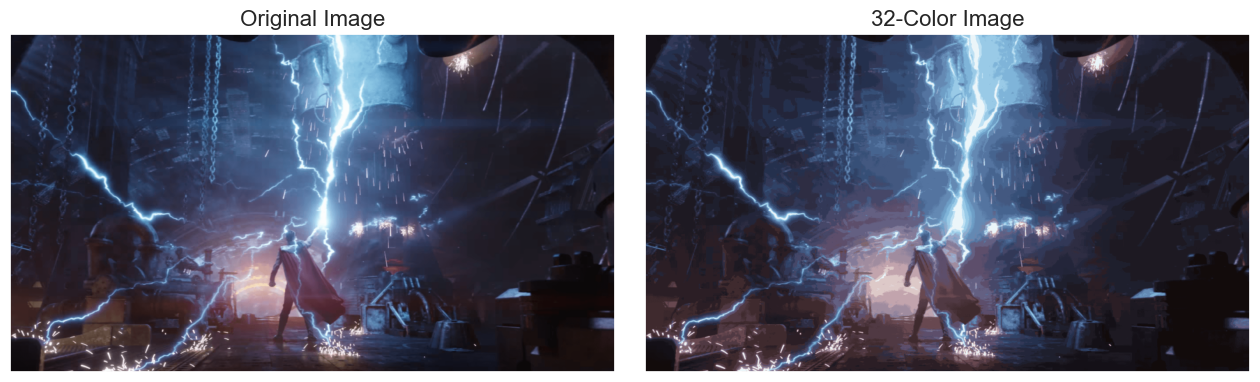

In [91]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(thor)
ax[0].set_title("Original Image", size=16)
ax[1].imshow(thor_recolored)
ax[1].set_title("32-Color Image", size=16)

## Conclusion

K-Means clustering groups similar pixel colors together, reducing the total number of colors while preserving the overall appearance of the image.